In [48]:
import json 
import numpy as np
from tqdm import tqdm_notebook

model = 'gpt2'
filter = 'filtered'
split = 'dev'
dataset = 'winobias'

# Plot y_{set-gender,z_set-gender}(u) - y_{set-gender,z_null(u)}(u) by
#  	 y_{null,z_set-gender(u)}(u) -  y_{null,z_null} (u)

fname = f"{dataset}_data/attention_intervention_{model}_{filter}_{split}.json"
with open(fname) as f:
	data = json.load(f)
x = []
y = []
for result in data['results']:
	y_null_z_set_gender = np.array(result['indirect_odds_head'])
	y_null_z_null = np.array(result['odds_base'])
	x.extend((y_null_z_set_gender - y_null_z_null).flatten().tolist())
	y_set_gender_z_set_gender = np.array(result['odds_alt']) 
	y_set_gender_z_null = np.array(result['direct_odds_head'])
	y.extend((y_set_gender_z_set_gender - y_set_gender_z_null).flatten().tolist())
	
assert len(x) == len(y) == 144 * len(data['results'])
x = np.array(x)
y = np.array(y)

	

In [49]:
print(np.mean(y))
print(np.mean(x))

print(np.mean(y-x) / np.mean(x) )

print(np.mean((y-x)/x))

0.0026910150220684553
0.0034980190320563448
-0.23070315015224052
2.3644324887246277


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns;sns.set()
sns.set(rc={'figure.figsize':(20, 20)})
plt.axis('equal')
plt.xlabel('y_{null,z_set-gender(u)}(u) -  y_{null,z_null}', fontsize=20)
plt.ylabel('y_{set-gender,z_set-gender}(u) - y_{set-gender,z_null(u)}(u)', fontsize=20)
sns.scatterplot(x, y)



CUTOFF 0.01
0.73088
0.468481683189934


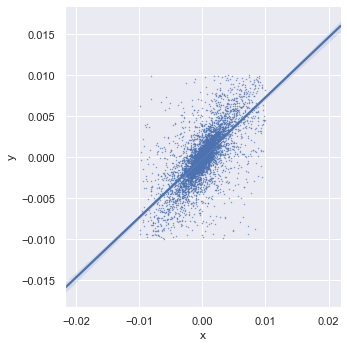

In [44]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression


# data = np.array(zip(x, y))
cutoff = .01
print('CUTOFF', cutoff)
box = np.where((x < cutoff) & (x > -cutoff) & (y < cutoff) & (y > -cutoff))
y_box = y[box]
x_box = x[box]
X = x_box.reshape(-1, 1)
Y = y_box.reshape(-1, 1)
reg = LinearRegression(fit_intercept=False).fit(X, Y)
print(f"{reg.coef_[0].item():.5f}")#, {reg.intercept_:.5f}")
print(reg.score(X, Y))

df = pd.DataFrame({'x': x_box, 'y': y_box})
# fig, ax = plt.subplots(figsize=(20,20))
g = sns.lmplot(x='x', y='y', data=df, scatter_kws={"s": .2})
# g = sns.lmplot(x='y', y='x', data=df, size=15, aspect=1, scatter_kws={"s": .2})
# g.set(xlim=(-cutoff, cutoff))
# g.set(ylim=(-cutoff, cutoff))



